In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [40]:
X.shape

(150, 4)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

X_reduced = pca.transform(X)
X_reduced.shape

(150, 2)

In [48]:
#X_reduced
#y

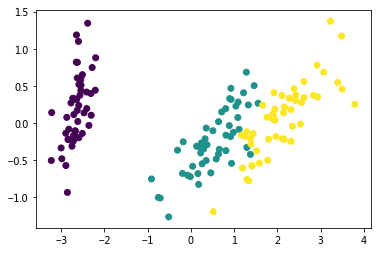

In [49]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.show()


In [50]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [51]:
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


In [54]:
#pca.explained_variance_ratio_

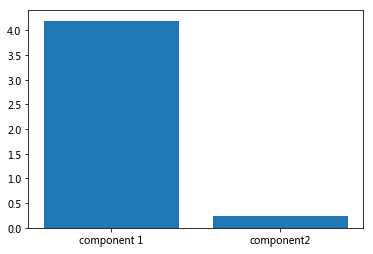

In [58]:
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()

In [59]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_reduced, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Component1')
    plt.ylabel('Component2')
    plt.show()


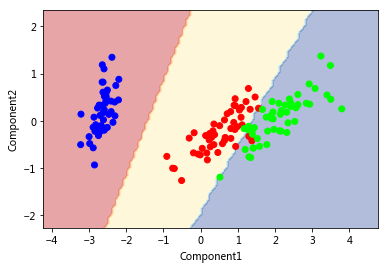

In [61]:
plot_estimator(clf, X_reduced, y)